In [790]:
# libraries needed for data analysis, pre-processing, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# output plots right below the cell input command
%matplotlib inline 
# standarization and normalization might be needed, and convertors needed categorical variables to indicator
from sklearn.preprocessing import StandardScaler, Normalizer, OrdinalEncoder, OneHotEncoder
# libraries needed for training, testing, building the model, and prediction
from sklearn.model_selection import train_test_split
# libraries for the chosen algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# libraries needed for model tuning
from sklearn.model_selection import GridSearchCV
# libraries needed for evaluation - metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [791]:
############################################# Data collection #################################################################
# read the csv file and create a dataframe

# overriding column names to a more conventional, understandable one
cols = ['age', 'work_class', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
# read the csv file as a dataset
df = pd.read_csv("adult.csv", header = 0, names = cols)
# print the shape of the dataset rows x cols
df.shape

(32561, 15)

In [792]:
#################################### Data analysis and pre-processing #########################################################
# print information about the dataset
df.info()
# print first 5 rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [793]:
# check for missing values / NA 
df.isna().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [794]:
# NA values are the '?' characters if we look closely
# replace those values with actual NA and save the dataset
df.replace('?', np.nan, inplace = True)

In [795]:
# check again for NA values
df.isnull().sum()

age                  0
work_class        1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [796]:
# workclass, occupation, and native country should not be dropped, i.e., low percentage of na values relatively to
# the total no. of entries
# so just drop the rows where there are na values
df.dropna(inplace = True)
# check the changes
df.isnull().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [797]:
# look for duplicated rows
df.duplicated().sum()

23

In [798]:
# drop the row duplicates and save the dataset
df.drop_duplicates(inplace = True)
# check the changes
print(df.duplicated().sum())
# get 5 rows to have a look on the current dataframe
df.head()

0


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [799]:
# reset indexing of rows for avoiding future errors
df.reset_index(drop = True, inplace = True)
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [800]:
# find symmetry, asymmetry in the columns
# find skewness of continous / numerical columns that will help us further to find outliers
skewnessBefore = df.skew(numeric_only = True)
print(skewnessBefore)

age                0.528971
final_weight       1.460055
education_num     -0.302845
capital_gain      11.898104
capital_loss       4.524409
hours_per_week     0.332386
dtype: float64


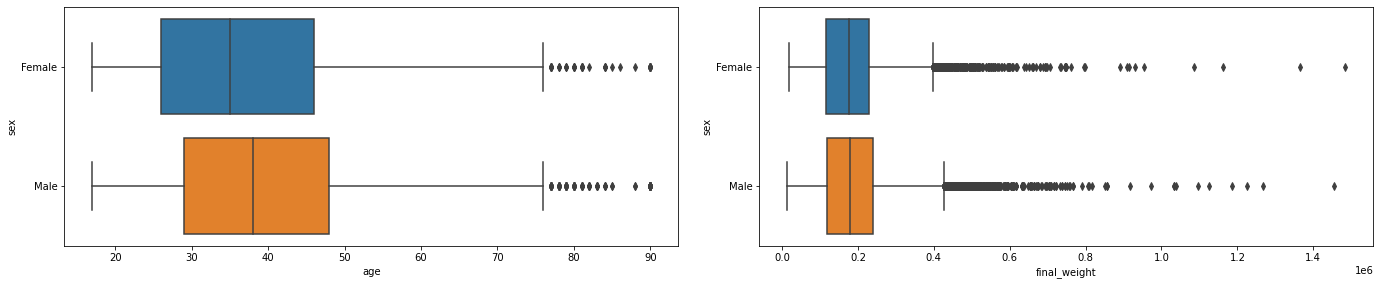

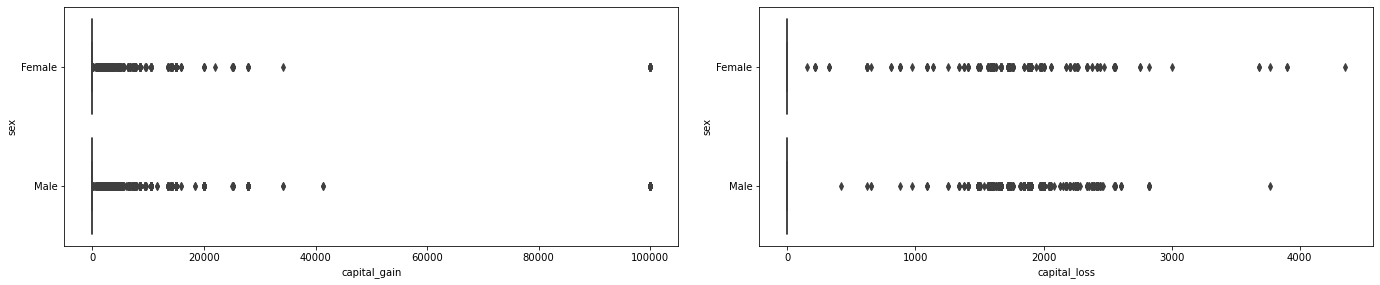

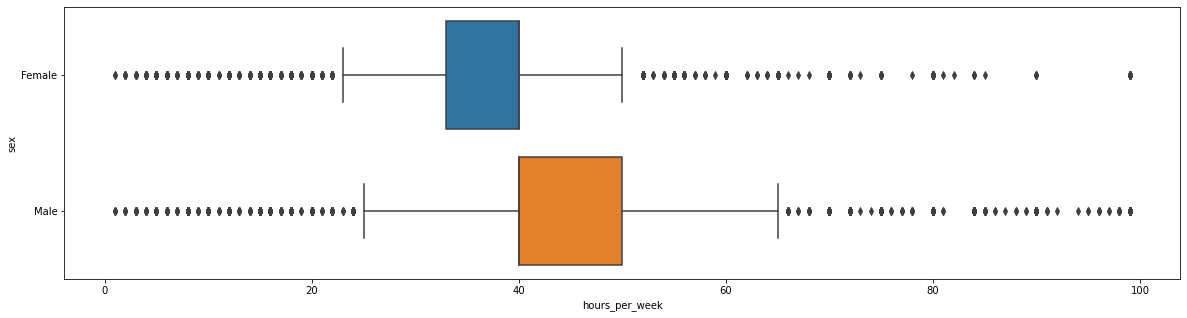

In [801]:
# identifying outliers for age, final_weight, education_num, capital_gain, capital_loss, hours_per_week
# using boxplots 
# from the previous output we deduced that:
# age is moderately skewed
# final_weight is highly skewed
# education_num is fairly symmetrical
# capital_gain is highly skewed
# capital_loss is highly skewed
# hours_per_week is fairly symmetrical

# for each column print print a boxplot according to sex category, in this case we want to print 2 boxplots aside
# make a function, because we might use it later to check the changes to print at least 2 boxplot, no more than that
def plotSkewness(temp_df, cols):
    for i in range(0, len(cols), 2):
        # the last boxplot does not have anything aside if it is an odd number of plots
        if (i != 0 and i == len(cols) - 1 and len(cols) % 2 != 0):
            # frame / figure for the last boxplot
            fig, ax = plt.subplots(1, 1, figsize = (20, 5))
            sns.boxplot(data = temp_df, x = skewedCols[i], y = 'sex')
        elif (i >= 0 and i <= len(cols) - 2 and len(cols) >= 2):
            # frame / figure for the 4 boxplots printed
            fig, ax = plt.subplots(1, 2, figsize = (20, 5))
            fig.tight_layout(pad = 5)
            # plot the first boxplot
            sns.boxplot(data = temp_df, x = cols[i], y = 'sex', ax = ax[0])
            # plot the second boxplot next to the previous one
            sns.boxplot(data = temp_df, x = cols[i + 1], y = 'sex', ax = ax[1])
            
skewedCols = ['age', 'final_weight', 'capital_gain', 'capital_loss', 'hours_per_week']
plotSkewness(df, skewedCols)

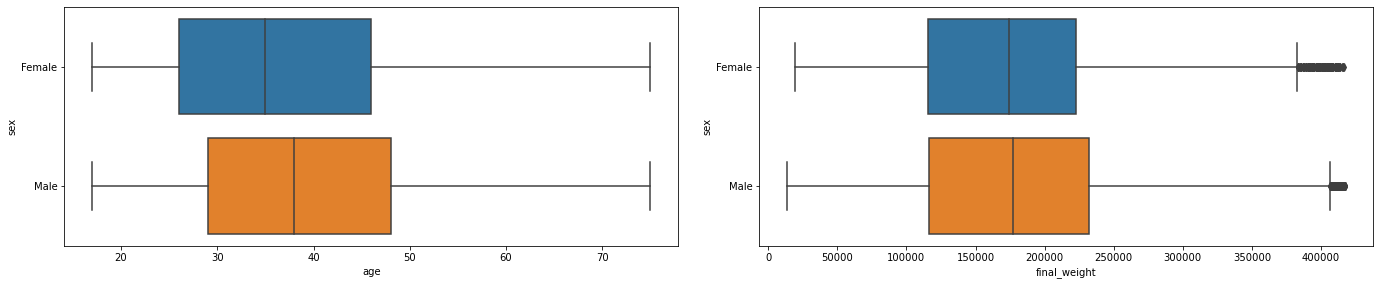

In [802]:
# after having a clear look on the above plots, and we can say that skewness of the cols stated above can be deduced by 
# finding the exact indices of the outliers using the IQR procedure
# of course boxplots helped us (visually) but IQR procedure is the most trustable one / mechanism behind the boxplot

# automate the process for the cols specified using a function and a loop to remove them
# we'll use it later as well
def removeOutliers(temp_df, cols):
    for i in cols:
        # lower quartile
        Q1 = np.percentile(temp_df[i], 25, interpolation = 'midpoint')
        # upper quartile
        Q3 = np.percentile(temp_df[i], 75, interpolation = 'midpoint')

        # calculate the interquartile
        IQR = Q3 - Q1

        # look for the outliers that are over upper boundary
        upper = np.where(temp_df[i] >= (Q3 + 1.5 * IQR))
        # look for the outliers that are below the lower boundary
        lower = np.where(temp_df[i] <= (Q1 - 1.5 * IQR))

        # upper and lower is an array inside of a tuple, just get the array out
        upper = upper[0]
        lower = lower[0]

        # remove outliers using the arrays obtained from above
        # drop outliers above upper boundary
        df.drop(upper, axis = 0, inplace = True)
        
        # drop outliers below lower boundary
        df.drop(lower, axis = 0, inplace = True)
        
        # removing rows will change indexing, so reset it each time
        df.reset_index(drop = True, inplace = True)
        
# specify which cols to remove outliers
# we'll deal with capital_gain and capital_loss a bit later
colsOutliers = ['age', 'final_weight']
removeOutliers(df, colsOutliers)
# now let's see the changes of the skewness
plotSkewness(df, colsOutliers)

[Text(0.5, 1.0, 'capital_gain > 0')]

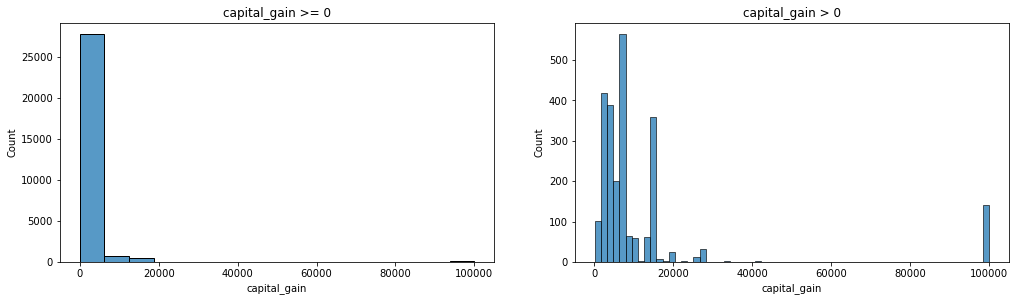

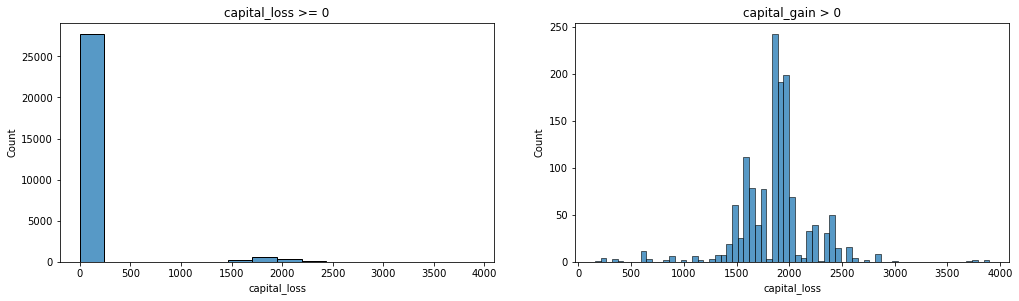

In [803]:
# from the previous plots, we can see that now age and final_weight are fairly symmetrical
# capital_gain and capital_loss outliers are a different case
# our boxplots for these two cols actually show that the interquartile range is 0 meaning that there is no variability
# in the middle 50 % but center of distribution can be anywhere

# select rows and columns for capital_gain and capital_loss that are not 0
capitalGain = df.loc[df['capital_gain'] != 0]
capitalLoss = df.loc[df['capital_loss'] != 0] 
 
# we want to visualize entries capital_gain and capital_loss values that are 0 and values that are not 0 using 
# a histogram chart

# capital_gain
# frame for the hisogram charts  
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig.tight_layout(pad = 5)
# plot capital_gain values >= 0
sns.histplot(data = df, x = df['capital_gain'], ax = ax[0]).set(title = 'capital_gain >= 0')
# plot capital_gain values >= 0 aside to the previous plot
sns.histplot(data = capitalGain, x = capitalGain['capital_gain'], ax = ax[1]).set(title = 'capital_gain > 0')

# capital_loss
# frame for the hisogram charts  
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig.tight_layout(pad = 5)
# plot capital_loss values >= 0
sns.histplot(data = df, x = df['capital_loss'], ax = ax[0]).set(title = 'capital_loss >= 0')
# plot capital_loss values > 0 aside to the previous plot
sns.histplot(data = capitalLoss, x = capitalLoss['capital_loss'], ax = ax[1]).set(title = 'capital_gain > 0')

In [804]:
# obviously, we do not want to delete outliers with value 0, these are true outliers, i.e., we expect people
# to have capital_gain and capital_loss equal to 0 in a year
# check the skewness of capital_gain and capital_loss for the range of values that are not equal to 0 and print them
# these are the ranges where we can look for outliers
print("capital_gain skewness:", capitalGain['capital_gain'].skew())
print("capital_loss skewness: ", capitalLoss['capital_loss'].skew())

capital_gain skewness: 3.437723971273536
capital_loss skewness:  -0.27403034368049717


<AxesSubplot:xlabel='capital_loss', ylabel='sex'>

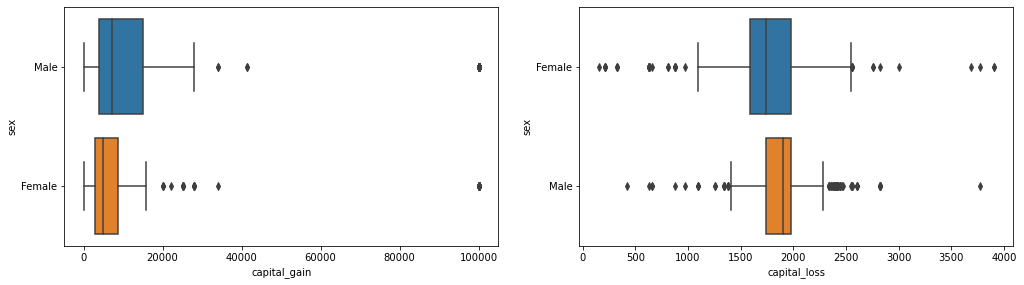

In [805]:
# as we can see from the from the histograms above of capital_gain and capital_loss
# the number of variable counts that have a value not equal to 0 is really low relatively to the variables 
# that have a value of 0 (almost the entire dataset)
# no wonder the IQR range of the boxplots of these two columns is 0, i.e., both have more than 50% of values equal to 0

# let's boxplot these two columns
# frame for the boxplots of capital_gain and capital_loss
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.tight_layout(pad = 5)
# plot capital_gain
sns.boxplot(data = capitalGain, x = df['capital_gain'], y = capitalGain['sex'], ax = ax[0])
# plot capital_loss next to previous plot
sns.boxplot(data = capitalLoss, x = df['capital_loss'], y = capitalLoss['sex'], ax = ax[1])

In [806]:
# we do not want to modify capital_loss because is fairly symmetrical but for capital_gain we se that the outliers is
# capital_gain is >= 999999 so we remove them 
dropRows = np.where(df['capital_gain'] >= 99999)
df.drop(dropRows[0], inplace = True)

In [807]:
# after
skewnessAfter = df.skew(numeric_only = True)
print(skewnessAfter)

age               0.406937
final_weight      0.413253
education_num    -0.294730
capital_gain      5.717926
capital_loss      4.467263
hours_per_week    0.352044
dtype: float64


[Text(0.5, 1.0, 'Skewness after')]

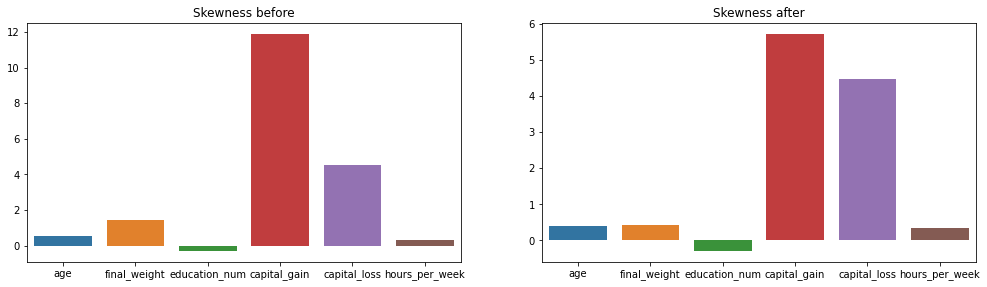

In [808]:
# let's compare the skewness before and after removing the outliers
# convert the skewness pandas arrays to dictionaries
dict_skewnessBefore = dict(skewnessBefore)
dict_skewnessAfter = dict(skewnessAfter)

# convert dictionaries' key and values to lists
keysBefore = list(dict_skewnessBefore.keys())
valsBefore = list(dict_skewnessBefore.values())

keysAfter = list(dict_skewnessAfter.keys())
valsAfter = list(dict_skewnessAfter.values())

# barplot them
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.tight_layout(pad = 5)
sns.barplot(x = keysBefore, y = valsBefore, ax = ax[0]).set(title = 'Skewness before')
sns.barplot(x = keysAfter, y = valsAfter, ax = ax[1]).set(title = 'Skewness after')

In [809]:
# convert categorical variables to indicator variables stage
l = list(df.select_dtypes(include = object))
print(len(l))

9


In [810]:
# we have 9 string objects
print(l)

['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [811]:
# let's have a look ...
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
1,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
2,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
3,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
4,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


In [819]:
# each categorical class has at least >= 2 levels, which method to use for converting?
# select all ordinal variables to convert them to numerical values
ordinal_vars = ['education', 'native_country']
df_ordinal = df[ordinal_vars]

encoder = OrdinalEncoder()
df_ordinal = encode.fit_transform(df_ordinal)

df_ordinal = pd.DataFrame(data = df_ordinal)
df_ordinal.columns = encoder.get_feature_names_out()
#df_ordinal.head()

#nominal_vars = ['work_class', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income']
#df1 = df.copy()
## initializer LabelBinarizer object
#lb = LabelBinarizer()
## convert work_class with its levels to indicator values
#convert_Workclass = lb.fit_transform(df1['work_class'])
##df.drop()

AttributeError: 'OrdinalEncoder' object has no attribute 'get_feature_names_out'